In [1]:
using Revise, DrWatson
@quickactivate

In [2]:
using main
using Distributions, BenchmarkTools, Plots, Pipe, ProgressMeter
ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling main [d4387e3f-b08f-4148-9d80-1476cd5e70f5]
└ @ Base loading.jl:1664


#### Functions for generating plots

In [276]:
cls = palette(:linear_wcmr_100_45_c42_n256, 100, rev=false)

function plt(d=2; lim=(-5, 5), l=200, bar=false)
    sq = range(lim..., length=l)
    if d == 2
        contourf(sq, sq, (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), c=cls, lw=0.1, colorbar=bar)
    elseif d >= 3
        contourf(sq, sq, (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), c=cls, lw=0.1, colorbar=bar)
    end
end

function plot_colorbar(lim)
    # cls = palette(:linear_wcmr_100_45_c42_n256, 100, rev=false)
    scatter([0, 0], [0, 1],
    zcolor=lim, clims=lim, xlims=(1, 1.0001), c=cls,
    label="", colorbar_title="", framestyle=:none
    )
end


function make_plot(x1, x2, d, lim; kwargs...)
    k = sample(1:d, 2)
    
    l = @layout [[grid(1,2) 
            a{0.25h} 
            b{0.25h}] c{0.01w}
    ]
    
    p = plt(d, lim=lim)
    p0 = plot_colorbar((0, 1))
    p1 = scatter(p, x1[:, k[1]], x1[:, k[2]], label="HMC", ratio=1, grid=false)
    p2 = scatter(p, x2[:, k[1]], x2[:, k[2]], label="HaRAM", ratio=1, grid=false)
    p3 = plot(x1[:, 1], ylim=lim, label="HMC")
    p4 = plot(x2[:, 1], ylim=lim, label="HaRAM")

    plot(p1, p2, p3, p4, p0, layout = l, title=[i==5 ? "(d=$d)" : "" for j in 1:1, i in 1:5]; kwargs...)
end

theme(:default)
Plots.gr_cbar_width[] = 0.02
gr(fmt=:png, levels=5, xguidefontsize=9, msw=0.2)

Plots.GRBackend()

In [121]:
model(d) = Model(
    ξ=MixtureModel(
        [MvNormal(x, 1.0 / d^0.2) for x in ([-10, +10] .* fill(ones(d)) ./ √d)]
    )
)

model (generic function with 1 method)

---
### Example 1: $\mathbb R^3$

In [252]:
d, lim = 3, (-8, 8);

In [245]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
  HMC:  0.9612077584483103


Acceptance Ratio = 0.9625
  2.481753 seconds (6.30 M allocations: 345.711 MiB, 3.13% gc time)


In [246]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
  HaRAM:  0.6740651869626075


Acceptance Ratio = 0.6737
  5.239756 seconds (13.37 M allocations: 735.596 MiB, 5.20% gc time)


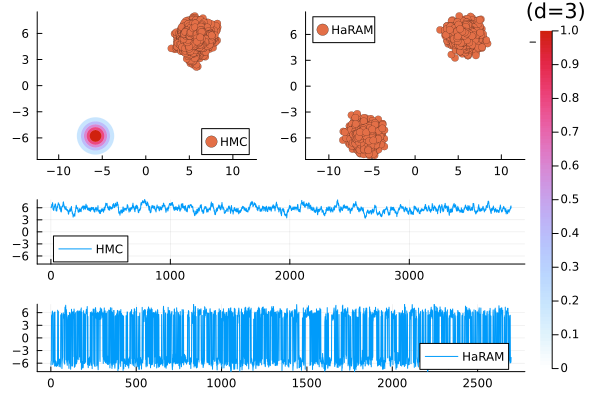

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [254]:
make_plot(x_hmc, x_haram, d, lim)

---
### Example 2: $\mathbb R^{10}$

In [256]:
d, lim = 10, (-6, 6)

(10, (-6, 6))

In [257]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
  HMC:  0.9682063587282543


Acceptance Ratio = 0.966
  4.813084 seconds (9.89 M allocations: 1.078 GiB, 7.30% gc time)


In [258]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
  HaRAM:  0.5388922215556888


Acceptance Ratio = 0.538
  6.952258 seconds (14.50 M allocations: 1.599 GiB, 8.07% gc time)


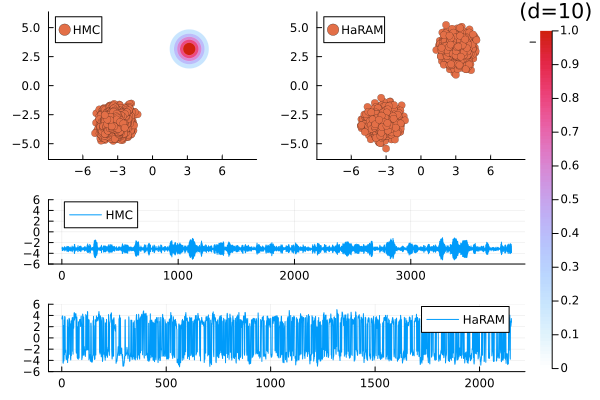

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [259]:
make_plot(x_hmc, x_haram, d, lim)

-----
### Example 3: $\mathbb R^{50}$

In [261]:
d, lim = 50, (-3, 3)

(50, (-3, 3))

In [265]:
@time s, a  = mcmc(
    DualAverage(λ=20, δ=0.65),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:43
  HMC:  0.8624275144971005


Acceptance Ratio = 0.8583
 43.714407 seconds (38.50 M allocations: 45.510 GiB, 10.33% gc time)


In [263]:
@time s, a  = mcmc(
    DualAverage(λ=20, δ=0.65),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:03:04
  HaRAM:  0.8204359128174366


Acceptance Ratio = 0.8241
184.932085 seconds (163.34 M allocations: 192.502 GiB, 10.16% gc time)


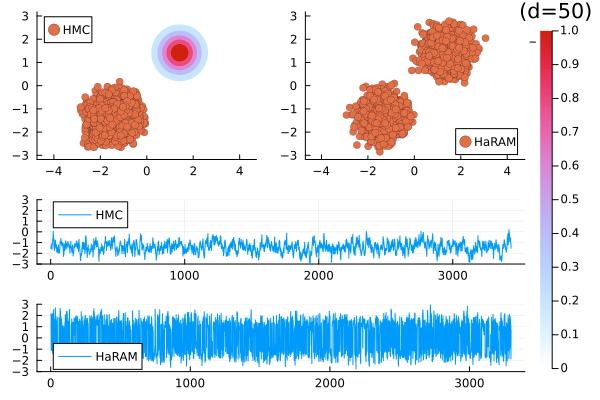

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [266]:
make_plot(x_hmc, x_haram, d, lim)

-----
### Example 4: $\mathbb R^{100}$

In [268]:
d, lim = 100, (-2, 2)

(100, (-2, 2))

In [297]:
@time s, a  = mcmc(
    DualAverage(λ=30, δ=0.55),
    HMC(),
    model(d); n=5000, n_burn=100
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:01:37
  HMC:  0.4501099780043991


Acceptance Ratio = 0.4506
 97.291882 seconds (57.14 M allocations: 176.549 GiB, 10.88% gc time)


In [294]:
@time s, a  = mcmc(
    DualAverage(λ=30, δ=0.5),
    HaRAM(),
    model(d); n=5000, n_burn=100
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:05:24
  HaRAM:  0.5624875024995001


Acceptance Ratio = 0.5612
324.392769 seconds (185.67 M allocations: 569.941 GiB, 11.08% gc time)


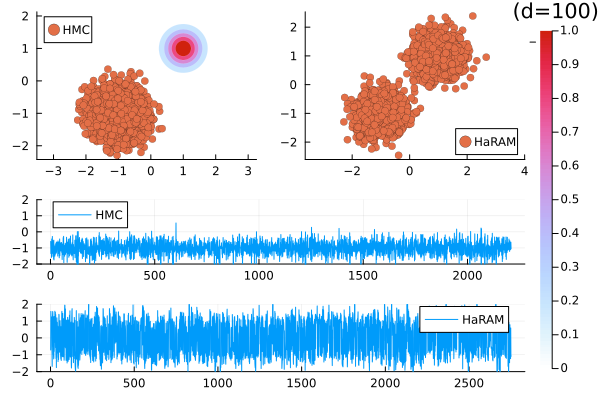

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [298]:
make_plot(x_hmc, x_haram, d, lim)